In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #C:\Users\student\.keras\datasets\ 에 데이터 있다.

In [3]:
#numpy 타입이다
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


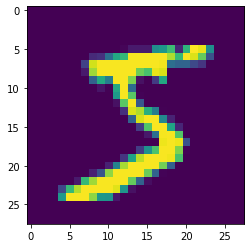

Label:  5


In [4]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

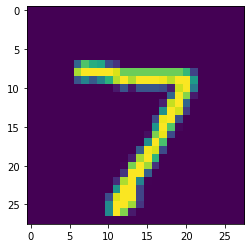

Label:  7


In [5]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [6]:
X_train.shape[0] # 갯수

60000

In [63]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1)) # -1은 나머지 영역은 한개 묶어서 하나의 차원으로 변경하라
X_test = X_test.reshape((X_test.shape[0], -1))

In [64]:
# use only 33% of training data to expedite the training process
#한번 돌때마다 랜덤으로 바뀜 
# 전체 데이터중 33퍼만 트레인으로 쓰겠다.
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7) 

In [9]:
print(X_train.shape)
print(y_train)

(19800, 784)
[6 9 2 ... 5 5 3]


In [65]:
# 원핫 인코딩 사용, 1 -> 0,0,1    2 -> 0,1,0   3 -> 1,0,0
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


##  Basic MLP model

In [12]:
model = Sequential()

In [13]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid')) #Input
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax')) #output, #소프트 맥스는 확률로 나온다

In [14]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)
#validation_split은 또다시 train 셋을 나눔 , 0.3이면 70퍼만 쓰겠다는 내용

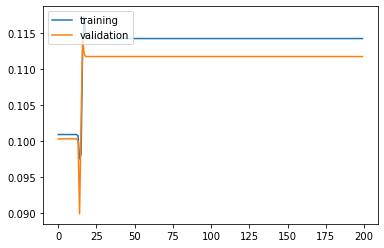

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [17]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

10000/10000 [==============================] - 0s 18us/step
Test accuracy:  0.11349999904632568


## 1. Weight Initialization

 

- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [18]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [19]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

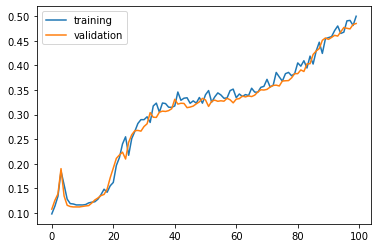

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [21]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

10000/10000 [==============================] - 0s 19us/step
Test accuracy:  0.4803999960422516


## 2. Nonlinearity (Activation function)

In [22]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [23]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

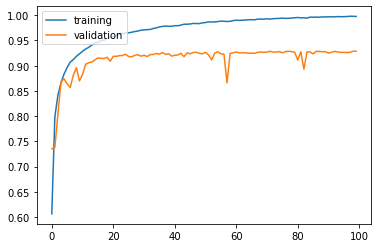

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [25]:
results = model.evaluate(X_test, y_test)
print('Test lost: ', results[0]) #loss 값
print('Test accuracy: ', results[1]) #accuracy 값

10000/10000 [==============================] - 0s 17us/step
Test lost:  0.43208359052784506
Test accuracy:  0.9280999898910522


## 3. Optimizers

In [26]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

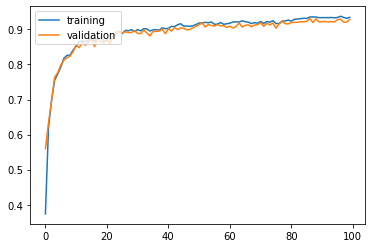

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [29]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

10000/10000 [==============================] - 0s 17us/step
Test accuracy:  0.9207000136375427


##  4. Batch Normalization

In [30]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [31]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

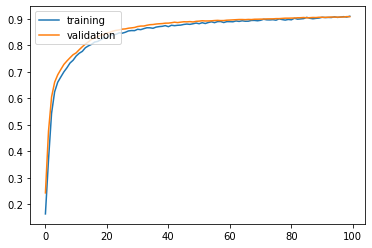

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [33]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

10000/10000 [==============================] - 0s 21us/step
Test accuracy:  0.9125999808311462


## 5. Dropout (Regularization)

In [34]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [35]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

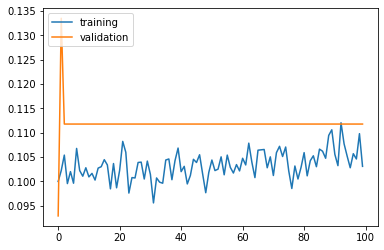

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
#train이 요동치는 이유는 가중치가 0을 만들어버리기 때문

In [37]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

10000/10000 [==============================] - 0s 14us/step
Test accuracy:  0.11349999904632568


## 6. Model Ensemble

In [28]:
import tensorflow as tf
import keras
import sklearn

In [66]:
print(tf.__version__)
print(keras.__version__)
print(sklearn.__version__)

2.1.0
2.3.1
0.21.3


In [67]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [68]:
print(y_train)
print(y_test)

[6 9 2 ... 5 5 3]
[7 2 1 ... 4 5 6]


In [69]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [70]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [71]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [72]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.4253 - accuracy: 0.0983
Epoch 2/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.3292 - accuracy: 0.1021
Epoch 3/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3071 - accuracy: 0.1140
Epoch 4/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.3015 - accuracy: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3000 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 32us/step - loss: 2.2993 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2988 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2984 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2980 - accuracy: 0.1135
Epoch 10/100
19800/19800 [====================

19800/19800 [==============================] - 1s 33us/step - loss: 2.2326 - accuracy: 0.2207
Epoch 78/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2297 - accuracy: 0.2232
Epoch 79/100
19800/19800 [==============================] - ETA: 0s - loss: 2.2269 - accuracy: 0.22 - 1s 33us/step - loss: 2.2267 - accuracy: 0.2255
Epoch 80/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2236 - accuracy: 0.2245
Epoch 81/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2202 - accuracy: 0.2255
Epoch 82/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2168 - accuracy: 0.2228
Epoch 83/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2131 - accuracy: 0.2249
Epoch 84/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2092 - accuracy: 0.2301
Epoch 85/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2051 - accuracy: 0.2327
Epoch 86

19800/19800 [==============================] - 1s 35us/step - loss: 2.2907 - accuracy: 0.1135
Epoch 53/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2904 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2902 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2899 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2896 - accuracy: 0.1135
Epoch 57/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2894 - accuracy: 0.1135
Epoch 58/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2891 - accuracy: 0.1135
Epoch 59/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2888 - accuracy: 0.1135
Epoch 60/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2885 - accuracy: 0.1135
Epoch 61/100
19800/19800 [========================

19800/19800 [==============================] - 1s 34us/step - loss: 2.2942 - accuracy: 0.1135
Epoch 29/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2940 - accuracy: 0.1135
Epoch 30/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2937 - accuracy: 0.1135
Epoch 31/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2935 - accuracy: 0.1135
Epoch 32/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2932 - accuracy: 0.1135
Epoch 33/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2929 - accuracy: 0.1135
Epoch 34/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2926 - accuracy: 0.1135
Epoch 35/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2923 - accuracy: 0.1135
Epoch 36/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2920 - accuracy: 0.1135
Epoch 37/100
19800/19800 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BAA7E4BB38>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BAA7E4BA90>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BAA7E4BBA8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [73]:
y_pred = ensemble_clf.predict(X_test)
print('Test accuracy:', accuracy_score(y_pred, y_test))

10000/10000 [==============================] - 0s 16us/step
Test accuracy: 0.2807


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [74]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [75]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [79]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 3 )
model3 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 3)



In [80]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [81]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.7699 - accuracy: 0.7628
Epoch 2/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.4304 - accuracy: 0.8760
Epoch 3/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.3577 - accuracy: 0.8981
Epoch 1/3
60000/60000 [==============================] - 5s 85us/step - loss: 0.7551 - accuracy: 0.7698
Epoch 2/3
60000/60000 [==============================] - 4s 73us/step - loss: 0.4263 - accuracy: 0.8764
Epoch 3/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.3600 - accuracy: 0.8971


VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BAA7BA6E48>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BAAC6DBC88>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [82]:
y_pred = ensemble_clf.predict(X_test)

In [83]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9618
